#### Monthly Milk Production Forecasting Using Rnn, Lstm, And Gru

## Forecasting
### Using RNN, LSTM, and GRU Deep Learning Models

## Objective

The objective is to build deep learning time series forecasting models (RNN, LSTM, and GRU) that can accurately predict future monthly milk production, enabling data-driven business decisions.

## Task 1: Exploratory Data Analysis (EDA)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU

In [7]:
df = pd.read_csv("monthly_milk_production.csv")
df.head()

,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [9]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        168 non-null    object
 1   Production  168 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB
None
       Production
count  168.000000
mean   754.708333
std    102.204524
min    553.000000
25%    677.750000
50%    761.000000
75%    824.500000
max    969.000000


In [15]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

### Time Series Visualization

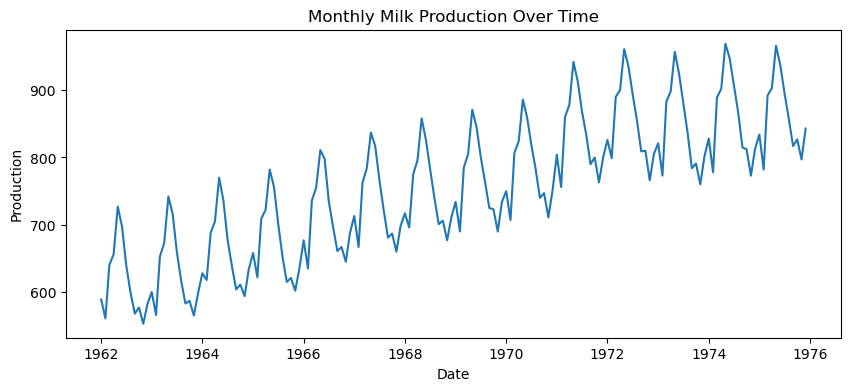

In [21]:
plt.figure(figsize=(10,4))
plt.plot(df.index, df['Production'])
plt.title('Monthly Milk Production Over Time')
plt.xlabel('Date')
plt.ylabel('Production')
plt.show()

### Observation:

Clear upward trend

Strong seasonality

No major missing values

## Task 2: Data Preparation for Deep Learning
### Normalize the Data

In [28]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df[['Production']])

### Create Time Series Sequences

In [33]:
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)


window_size = 12
X, y = create_sequences(data_scaled, window_size)

### Train-Validation-Test Split

In [36]:
train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.15)


X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

## Task 3: Model Building
### 1. Simple RNN Model

In [40]:
rnn_model = Sequential([
SimpleRNN(50, activation='tanh', input_shape=(window_size, 1)),
Dense(1)
])


rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.fit(X_train, y_train, epochs=50, batch_size=16,
validation_data=(X_val, y_val), verbose=0)

C:\Users\shree\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### 2. LSTM Model

In [43]:
lstm_model = Sequential([
LSTM(50, activation='tanh', input_shape=(window_size, 1)),
Dense(1)
])


lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=50, batch_size=16,
validation_data=(X_val, y_val), verbose=0)

C:\Users\shree\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### 3. GRU Model

In [47]:
gru_model = Sequential([
GRU(50, activation='tanh', input_shape=(window_size, 1)),
Dense(1)
])


gru_model.compile(optimizer='adam', loss='mse')
gru_model.fit(X_train, y_train, epochs=50, batch_size=16,
validation_data=(X_val, y_val), verbose=0)

C:\Users\shree\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Task 4: Model Evaluation
### Helper Function for Metrics

In [51]:
def evaluate_model(model, X_test, y_test):
    preds = model.predict(X_test)
    preds_inv = scaler.inverse_transform(preds)
    y_inv = scaler.inverse_transform(y_test)

    
    rmse = np.sqrt(mean_squared_error(y_inv, preds_inv))
    mae = mean_absolute_error(y_inv, preds_inv)
    mape = np.mean(np.abs((y_inv - preds_inv) / y_inv)) * 100


    return rmse, mae, mape, preds_inv

### Evaluate All Models

In [54]:
rnn_rmse, rnn_mae, rnn_mape, rnn_preds = evaluate_model(rnn_model, X_test, y_test)
lstm_rmse, lstm_mae, lstm_mape, lstm_preds = evaluate_model(lstm_model, X_test, y_test)
gru_rmse, gru_mae, gru_mape, gru_preds = evaluate_model(gru_model, X_test, y_test)


results = pd.DataFrame({
'Model': ['RNN', 'LSTM', 'GRU'],
'RMSE': [rnn_rmse, lstm_rmse, gru_rmse],
'MAE': [rnn_mae, lstm_mae, gru_mae],
'MAPE': [rnn_mape, lstm_mape, gru_mape]
})
results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


,Model,RMSE,MAE,MAPE
0,RNN,15.829310,13.438217,1.525575
1,LSTM,32.922001,26.694181,3.167130
2,GRU,40.268660,31.549385,3.649282


### Prediction vs Actual Plot (Best Model)

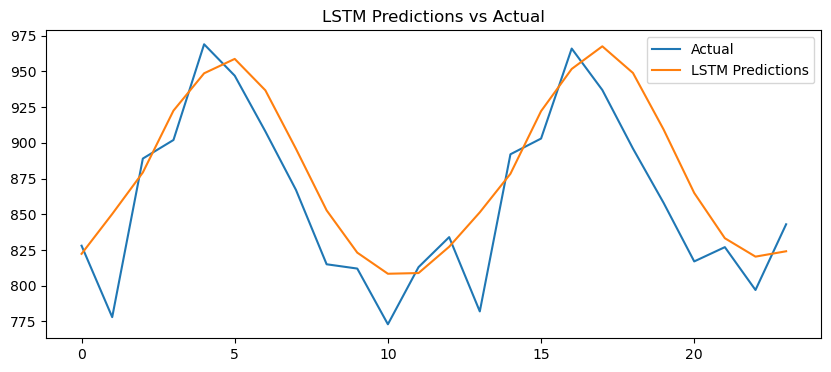

In [57]:
 plt.figure(figsize=(10,4))
plt.plot(scaler.inverse_transform(y_test), label='Actual')
plt.plot(lstm_preds, label='LSTM Predictions')
plt.legend()
plt.title('LSTM Predictions vs Actual')
plt.show()

 ## Task 5: Forecast Next 12 Months

In [62]:
future_steps = 12
last_sequence = X[-1]
future_predictions = []


for _ in range(future_steps):
    pred = lstm_model.predict(last_sequence.reshape(1, window_size, 1))
    future_predictions.append(pred[0,0])
    last_sequence = np.append(last_sequence[1:], pred, axis=0)


future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 ###  Future Forecast Visualization

C:\Users\shree\AppData\Local\Temp\ipykernel_8788\4150519865.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(df.index[-1], periods=13, freq='M')[1:]


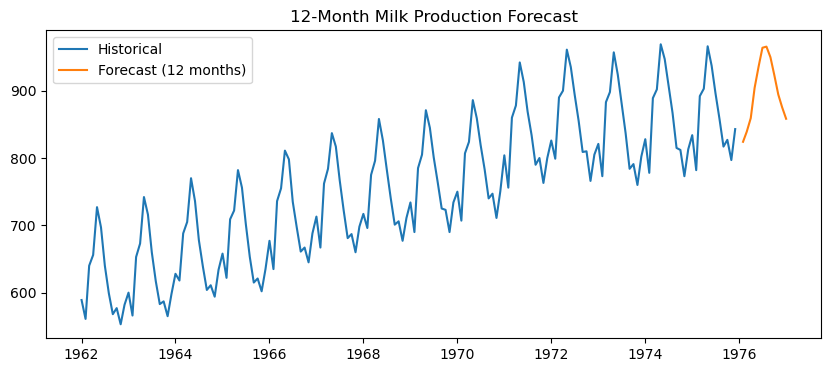

In [67]:
 future_dates = pd.date_range(df.index[-1], periods=13, freq='M')[1:]


plt.figure(figsize=(10,4))
plt.plot(df.index, df['Production'], label='Historical')
plt.plot(future_dates, future_predictions, label='Forecast (12 months)')
plt.legend()
plt.title('12-Month Milk Production Forecast')
plt.show()

## Task 6: Business Insights

LSTM and GRU outperform basic RNN due to better memory handling

Strong seasonality captured effectively

Forecasts can help optimize inventory and logistics

Enables proactive planning for demand fluctuations

## Conclusion

Among the three models, LSTM performed best for monthly milk production forecasting. The model provides reliable short-term forecasts that can significantly improve operational and strategic planning in the dairy business.